# Aprendizaje Supervisado - Redes Neuronales

Las redes neuronales artificiales son un modelo de aprendizaje supervisado inspirado en el comportamiento observado en su homólogo biológico. En general, una red neuronal está formada por un conjunto de neuronas artificiales (perpceptrones simples) conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida. 

![NeuralNetworks](imagenes/ann.png)

## Importamos las Librerías

In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn.neural_network import MLPClassifier # Clase para entrenar un perceptrón multicapa
from sklearn import preprocessing #Para transformar y escalar los datos
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos


## 1. Empecemos con un ToySet

Vamos a crear un conjunto de datos de juguete basado en 3 Gaussianas con algo de ruido para ver el comportamiento del árbol de decisión, trazando las fronteras de decisión.

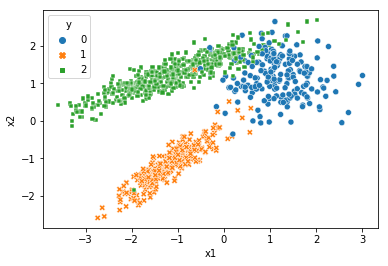

In [2]:
#Generamos el conjunto de datos de 3 clases.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.2, 0.3, 0.5],
                           class_sep=1.2, random_state=34)

#Creamos un DataFrame a partir del conjunto de datos, para visualizarlo
df = pd.DataFrame(data=X, columns=["x1", "x2"])
df['y'] = y

sns.scatterplot(data=df, x="x1", y="x2", hue="y", palette="tab10", style="y")

In [6]:
# Entrenamos la red neuronal con 2 capas ocultas de 10 neuronas
ann = MLPClassifier(hidden_layer_sizes=(10, 20, 30, 10), activation='relu', solver='adam', max_iter=500)
ann.fit(X,y)

MLPClassifier(hidden_layer_sizes=(10, 20, 30, 10), max_iter=500)

In [7]:
###
# Esta función la usaremos para mostrar las fronteras de decisión de los clasificadores entrenados
###
import matplotlib

def plot_decision_function(X, y, clf, ax=None, cmap="jet"):
    ax = ax or plt.gca()
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap, levels=np.arange(n_classes + 1) - 0.5, zorder=1)  
    m = ['o', 's', 'v', '^', '<', '>', '8', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
    l = np.unique(y)
    rgb = matplotlib.cm.get_cmap(cmap)(np.linspace(0.0, 1.0, l.shape[0]))

    for l in np.unique(y):
        if (np.unique(y).shape[0] == 3 and l == 1):
            ax.scatter(X[y==l, 0], X[y==l, 1], alpha=0.6, c=[0.17,0.62,0.17], edgecolor=[0.17,0.62,0.17], cmap=cmap, marker=m[l])
        else:
            ax.scatter(X[y==l, 0], X[y==l, 1], alpha=0.6, c=rgb[l], edgecolor=rgb[l], cmap=cmap, marker=m[l])
    #ax.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y, edgecolor="k", cmap="jet")

Text(0.5,1,'Fronteras de decisión')

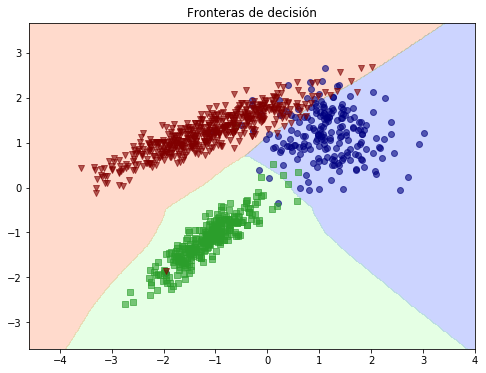

In [8]:
#Visualizamos la frontera de decisión
plt.figure(figsize=(8, 6))
ax = plt.gca()

plot_decision_function(X, y, ann, ax)
ax.set_title('Fronteras de decisión')

Observe que cuando se usan menos neuronas y capas ocultas, las fronteras tienden a ser más lineales

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'Fronteras de decisión')

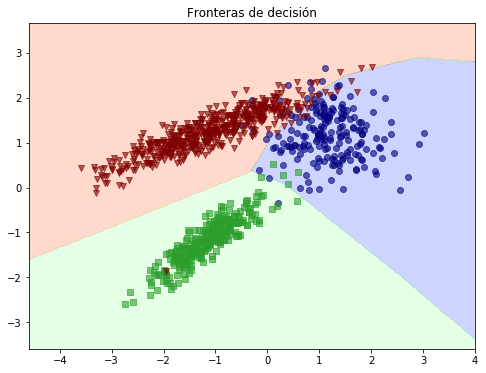

In [10]:
ann = MLPClassifier(hidden_layer_sizes=(5, 5), activation='relu', solver='adam', max_iter=500)
ann.fit(X,y)

plt.figure(figsize=(8, 6))
ax = plt.gca()

plot_decision_function(X, y, ann, ax)
ax.set_title('Fronteras de decisión')

## 2. Ahora usemos la red sobre otro cojunto de datos

Veámos como se comporta el árbol de decisión con un conjunto de datos que tiene datos numéricos y categóricos, para ello usemos el conjunto de datos de las compras.

In [11]:
#Cargamos el conjunto de datos
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

#Separamos el dataset
X = dataset['data']
y = dataset['target']
Xn = dataset['feature_names']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
#En este caso debemos escalar los datos porque las redes neuronales son sencibles a la escala
scl = preprocessing.StandardScaler()
scl.fit(X_train)

#Con los parámetros de normalización, normalizamos los dos conjuntos de datos
X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

In [14]:
#Entrenamos la red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(30, 30), activation='tanh', solver='adam', max_iter=20000, early_stopping=False)
mlp.fit(X_train_std,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 30), max_iter=20000)

Precisión del clasificador: 95.32 


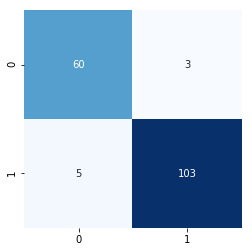

In [15]:
#Evaluamos la red
y_pred = mlp.predict(X_test_std)

#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")